In [16]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                 padding="same", activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [18]:
import time

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, batch_size=1000,
                validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)



Epoch 1/5
60/60 [==============================] - 27s 450ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.0287 - val_accuracy: 0.9919
Epoch 2/5
60/60 [==============================] - 28s 474ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0287 - val_accuracy: 0.9916
Epoch 3/5
60/60 [==============================] - 29s 480ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0271 - val_accuracy: 0.9932
Epoch 4/5
60/60 [==============================] - 28s 461ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0260 - val_accuracy: 0.9930
Epoch 5/5
60/60 [==============================] - 28s 462ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0277 - val_accuracy: 0.9935
fit time :  142.1818084716797


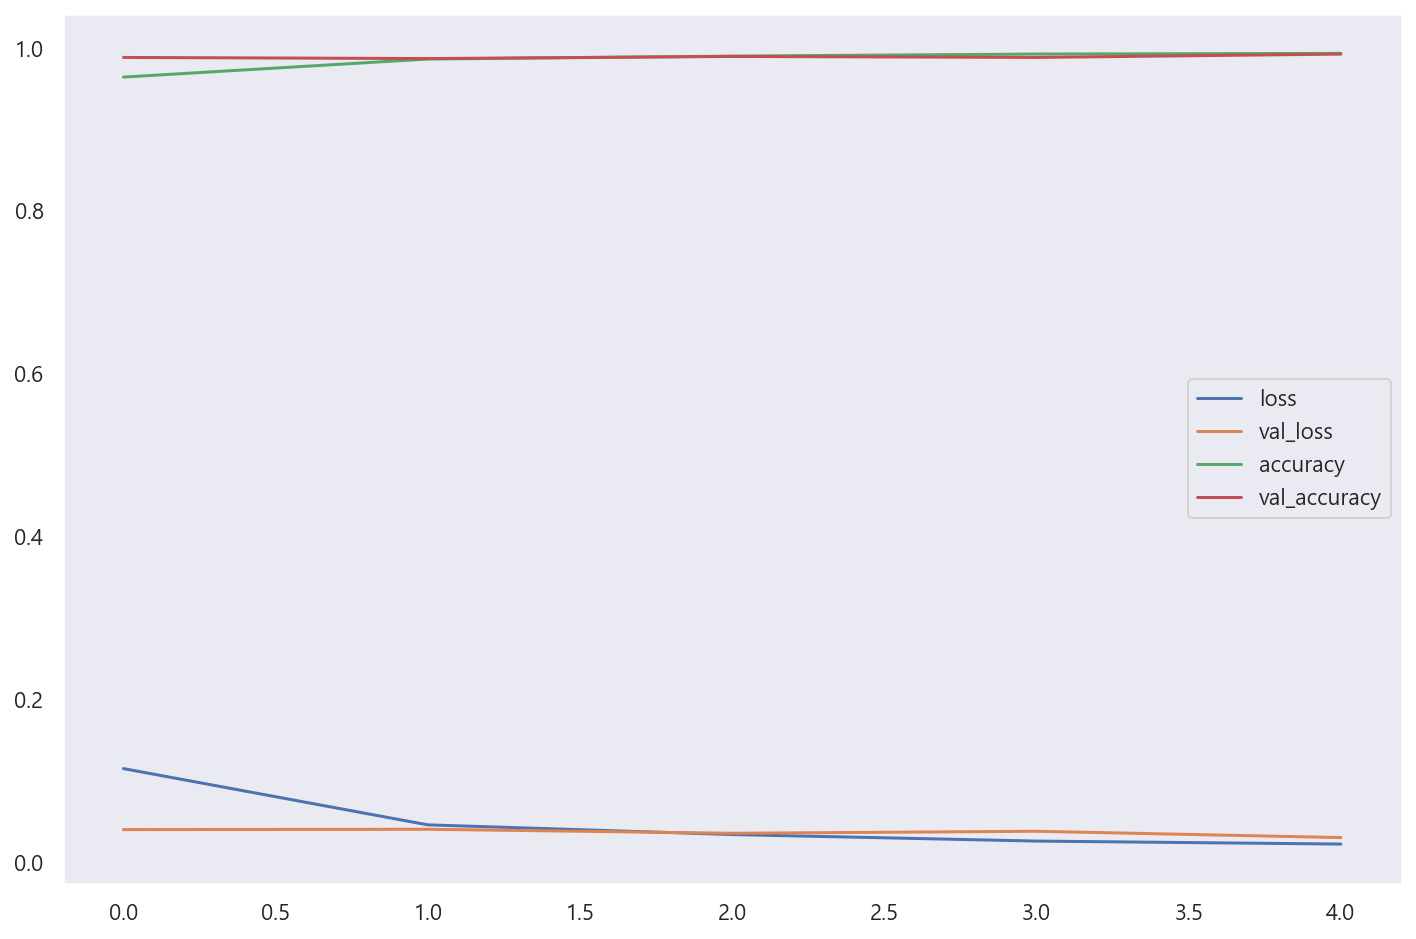

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [5]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0296 - accuracy: 0.9919
Test loss : 0.029618073254823685
Test accuracy : 0.9919000267982483


In [8]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [9]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

81

In [10]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[947,
 381,
 2462,
 2760,
 4163,
 8094,
 4176,
 4879,
 1299,
 2921,
 8246,
 2927,
 3422,
 2760,
 2462,
 4888]

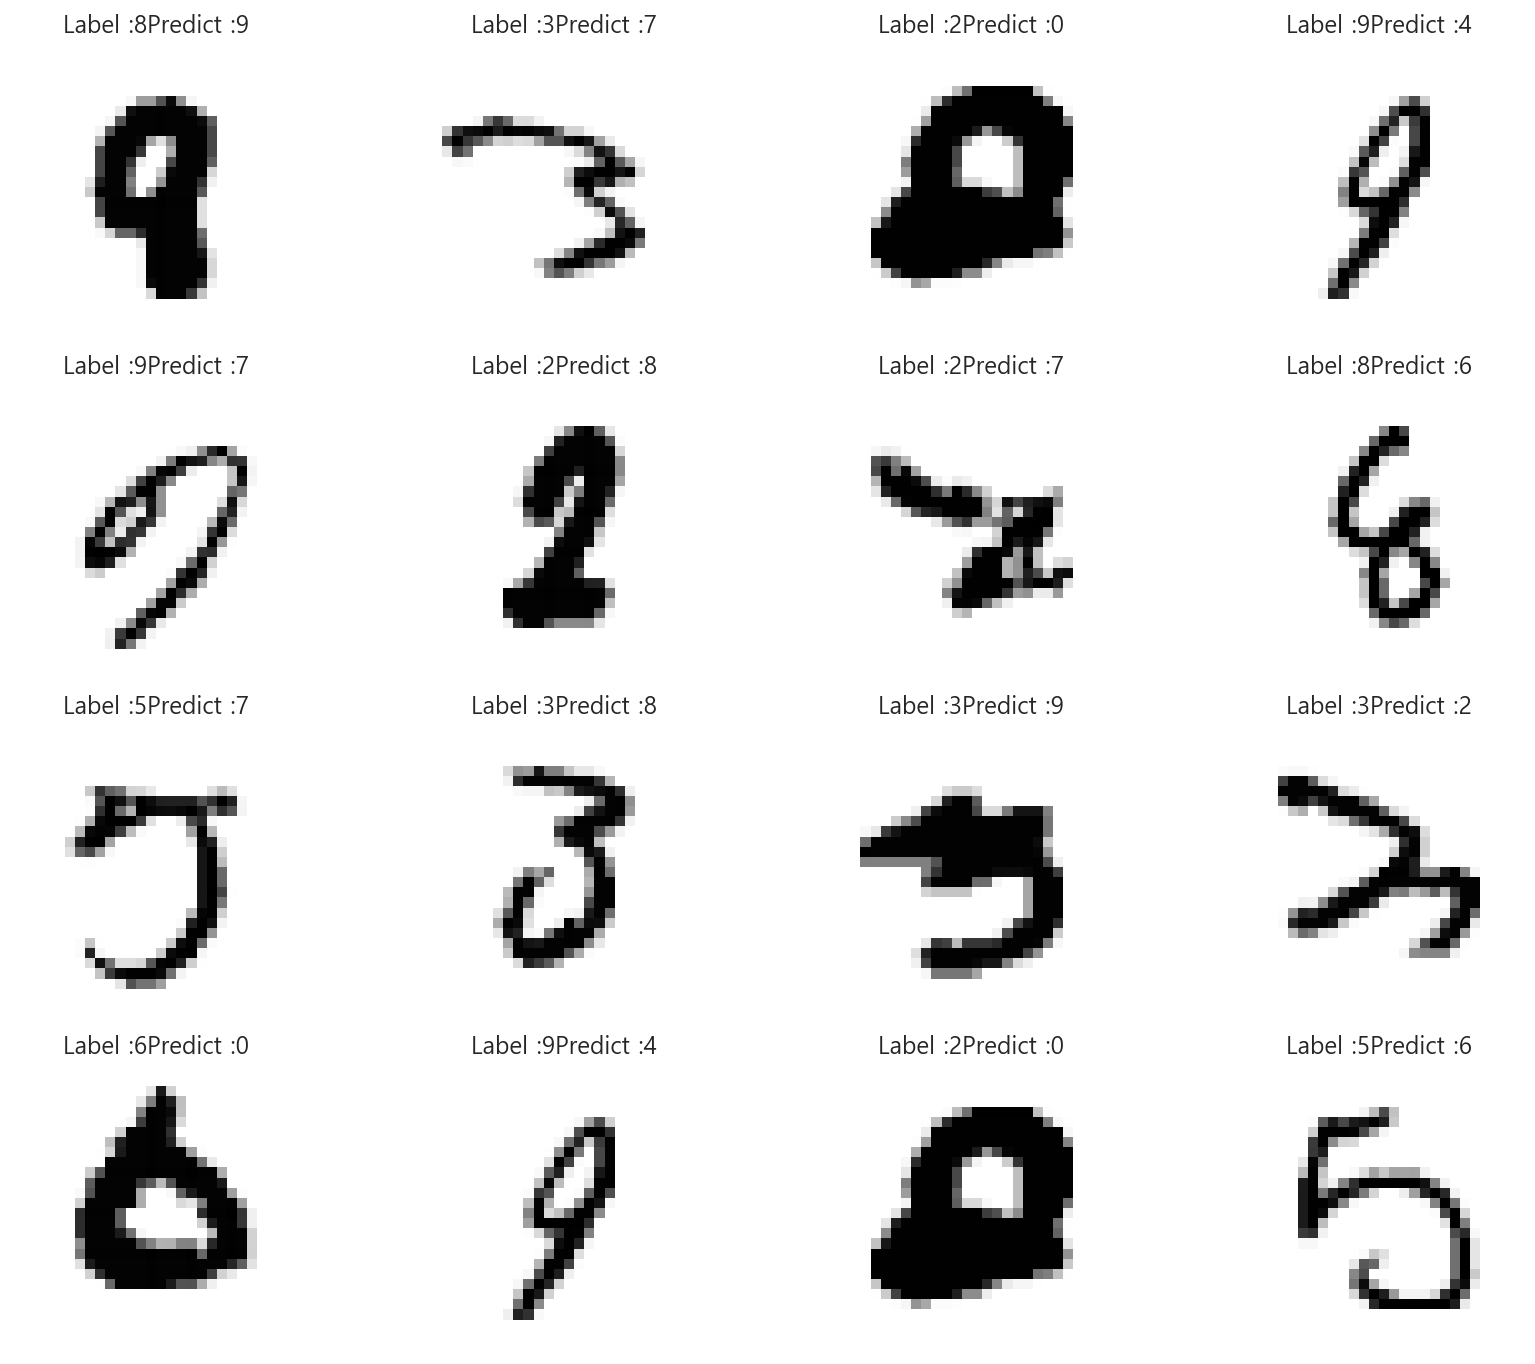

In [13]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [14]:
model.save('MNIST_CNN_model.h5')

In [19]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                 padding="same", activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)             

In [21]:
import time

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, batch_size=1000,
                validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)



Epoch 1/5
60/60 [==============================] - 26s 437ms/step - loss: 0.6890 - accuracy: 0.7567 - val_loss: 0.4374 - val_accuracy: 0.8432
Epoch 2/5
60/60 [==============================] - 30s 495ms/step - loss: 0.4018 - accuracy: 0.8561 - val_loss: 0.3685 - val_accuracy: 0.8696
Epoch 3/5
60/60 [==============================] - 30s 496ms/step - loss: 0.3523 - accuracy: 0.8739 - val_loss: 0.3485 - val_accuracy: 0.8772
Epoch 4/5
60/60 [==============================] - 29s 491ms/step - loss: 0.3167 - accuracy: 0.8864 - val_loss: 0.3129 - val_accuracy: 0.8914
Epoch 5/5
60/60 [==============================] - 29s 487ms/step - loss: 0.2981 - accuracy: 0.8932 - val_loss: 0.2994 - val_accuracy: 0.8919
fit time :  147.05074453353882


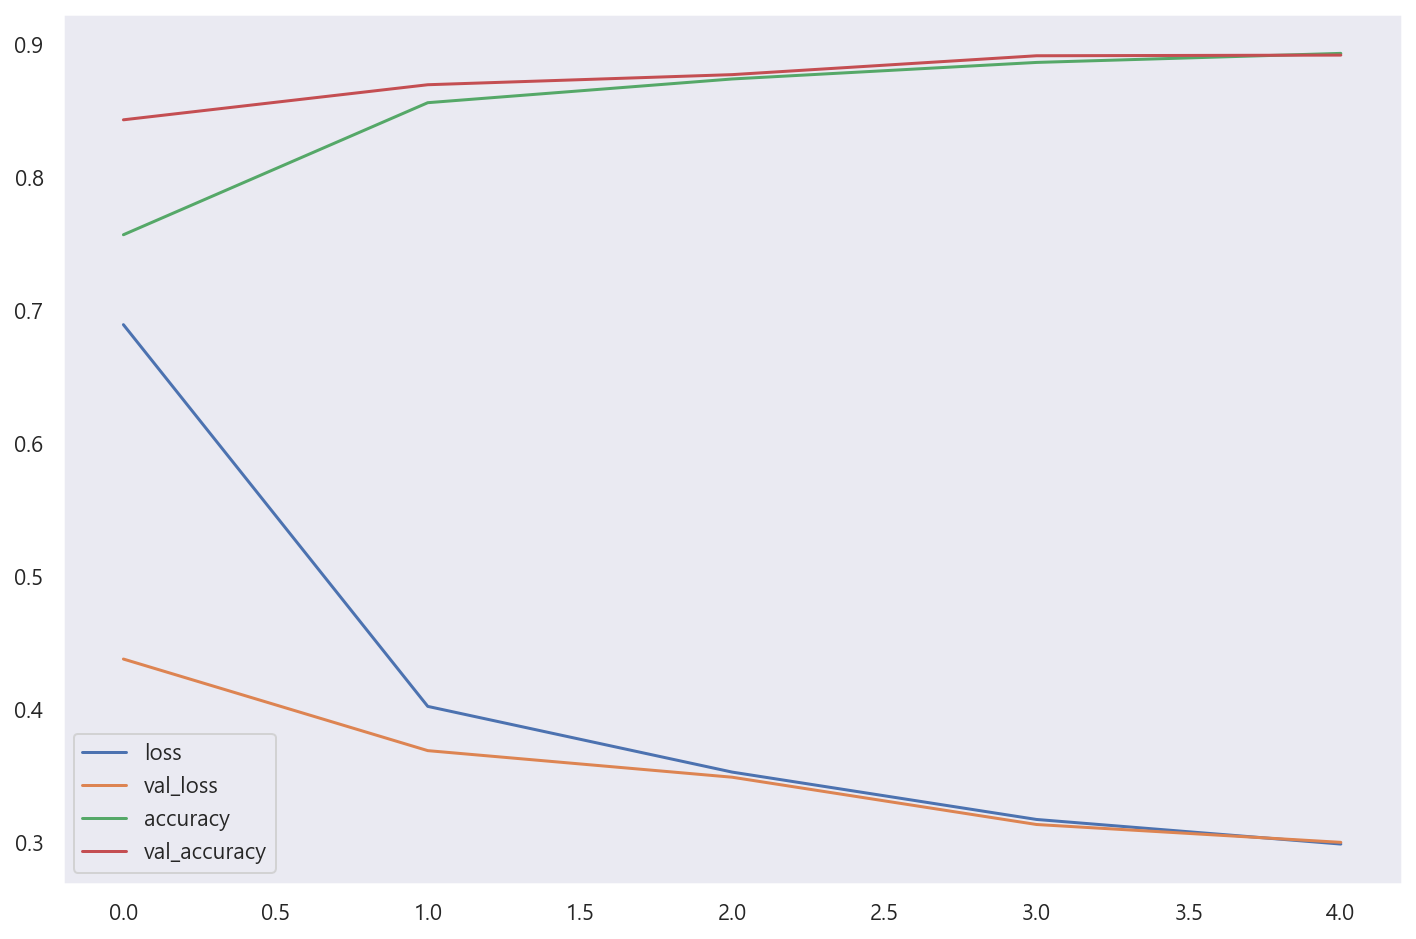

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [23]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.2994 - accuracy: 0.8919
Test loss : 0.2994307577610016
Test accuracy : 0.8919000029563904


In [24]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [25]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1081

In [26]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[5052,
 7004,
 9064,
 5971,
 6626,
 7961,
 8465,
 1111,
 9263,
 9949,
 1101,
 7028,
 3327,
 454,
 8007,
 474]

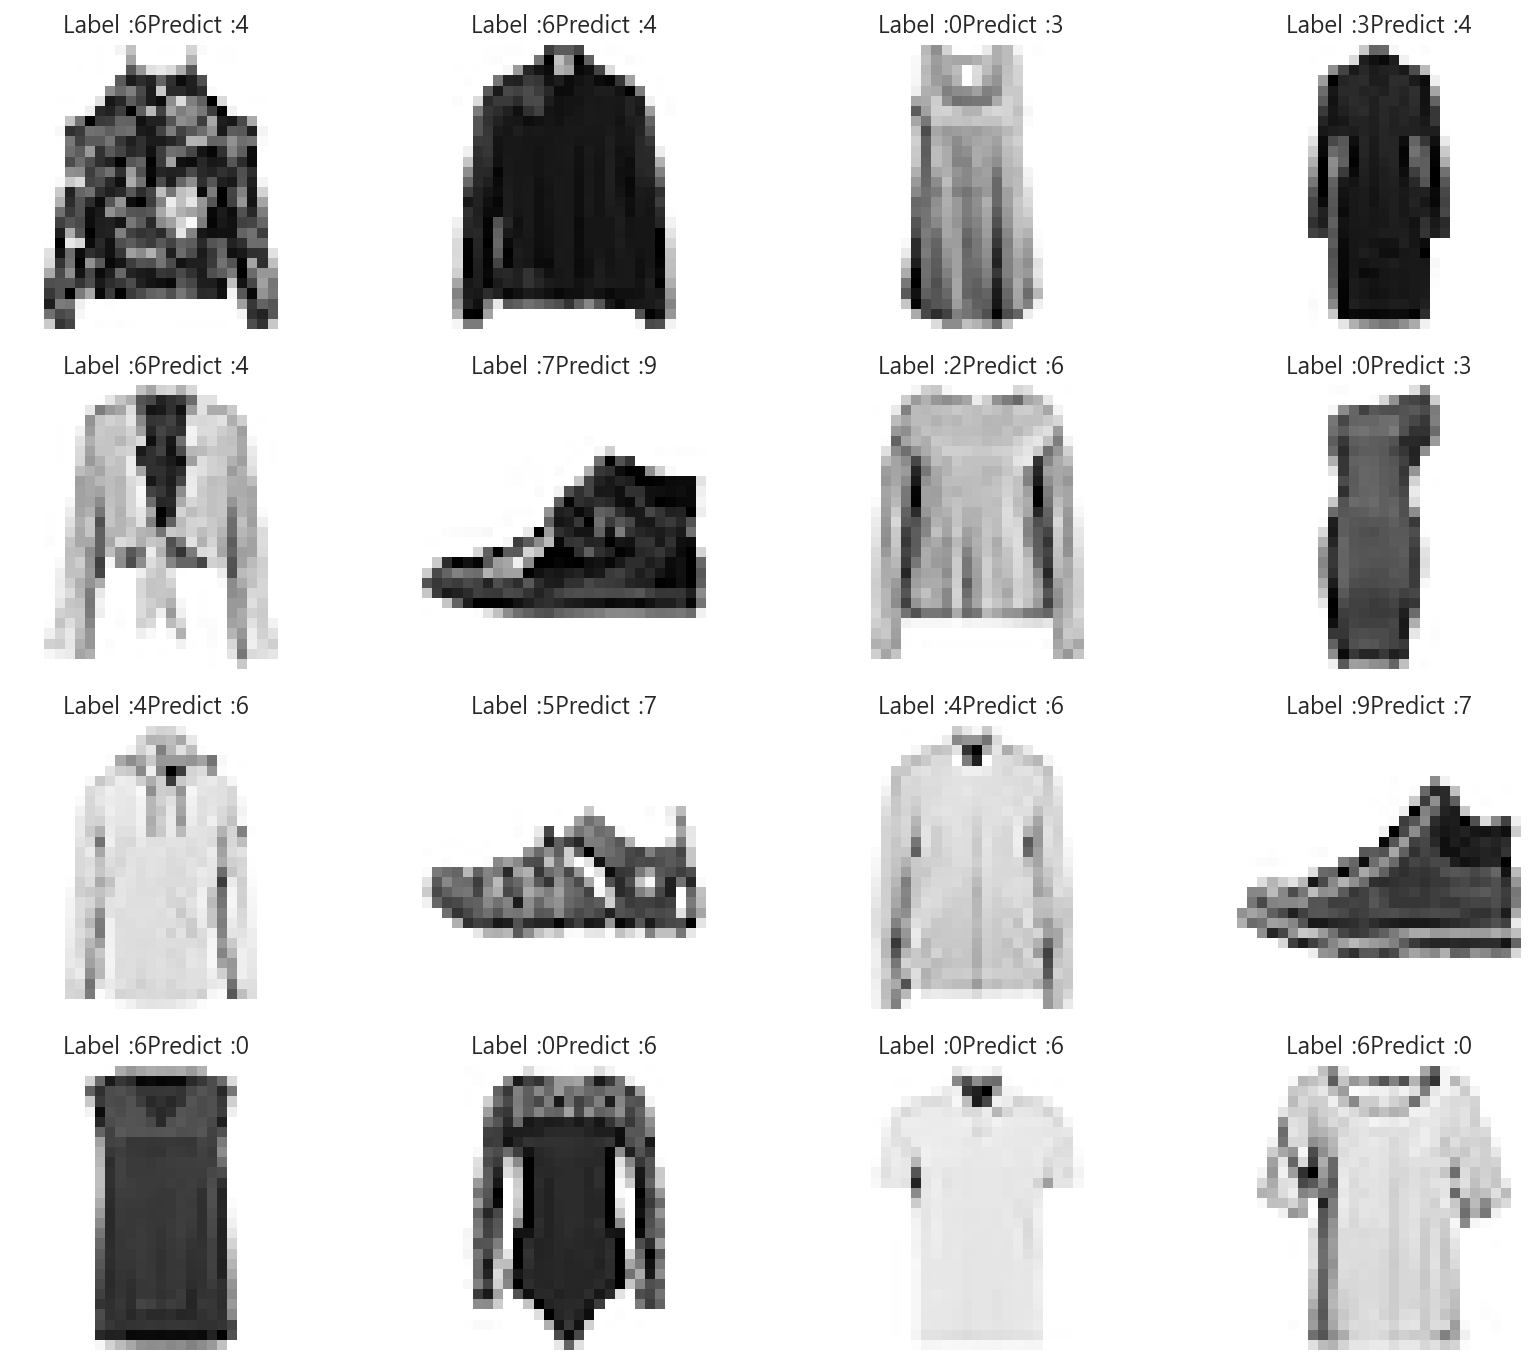

In [27]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()